# Curve Fitting

<font color=blue>***How do we do data science?  <font color=red>Take some sample observations, fit a model to them, and then use the model to make predictions.  Typically there is a target variable whose value we don't know and want to predict, and some other data we know about an instance of interest that we do know.  We need the model to take what we do know and predict the value of the target variable.***

<font color=blue>***What models have we fit to data so far (recommender system and spam filter)?  <font color=red>In our recommender system, our model was a matrix of conditional probabilities, each probability expressing the probability that a customer bought book B given that they previously purchased A, fit to a bunch of purchase histories.  Our spam filter fit a Naïve Bayes model to a bunch of token vectors derived from a corpus of emails.***

<font color=red>***We are going to start with a bunch of 131 review.  <font color=sandybrown>Drag these things out of them.  <font color=blue>What models did we fit to data in ISTA 131?  In the 1-dimensional case?  For example, a sequence of student grades?  In the 2D case?  <font color=red>A point - the mean.  <font color=blue>What does the mean look like as a curve on two-dimensional plot - try to remember the sea ice extent vs. time example?  <font color=red>A horizontal line.  <font color=blue>What other model did we fit to 2D data (xy-coordinate system) and how did we make it?<font color=red>A regression line.  We used statsmodels to calculate the parameters of the model.  <font color=blue>Which were?  <font color=red>The slope and intercept.  Let's review the in-class sea ice extent example from 131:***

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm
df = pd.read_csv('data_79_17.csv', index_col=0)
df.head()

,0101,0102,0103,0104,0105,0106,0107,0108,0109,0110,...,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231
1979,14.7910,14.9970,14.9595,14.9220,14.9255,14.9290,14.9485,14.968,15.0790,15.1900,...,13.6190,13.6960,13.7730,13.8535,13.9340,14.0175,14.1010,14.0965,14.092,14.1460
1980,14.2000,14.2510,14.3020,14.3580,14.4140,14.4660,14.5180,14.556,14.5940,14.6295,...,13.7790,13.7885,13.7980,13.8990,14.0000,14.0860,14.1720,14.1325,14.093,14.1745
1981,14.2560,14.3560,14.4560,14.4455,14.4350,14.5620,14.6890,14.654,14.6190,14.6545,...,13.8850,13.8770,13.9465,14.0160,13.9845,13.9530,14.0405,14.1280,14.176,14.2240
1982,14.3515,14.4790,14.5605,14.6420,14.7610,14.8800,14.9365,14.993,15.0225,15.0520,...,13.9630,14.0280,14.0930,14.1380,14.1830,14.1635,14.1440,14.1515,14.159,14.2060
1983,14.2530,14.2795,14.3060,14.4000,14.4940,14.4805,14.4670,14.541,14.6150,14.6315,...,13.4325,13.5390,13.5395,13.5400,13.6020,13.6640,13.7595,13.8550,13.881,13.9070


<font color=sandybrown>***Do the one below, then go into command mode and copy it as necessary or just keep altering the same cell and rerunning.  Add the bits piece by piece.***

In [3]:
df['mean'] = df.mean(axis=1)
df.head(5).iloc[:, -3:]

,1230,1231,mean
1979,14.092,14.1460,12.325240
1980,14.093,14.1745,12.323664
1981,14.176,14.2240,12.129721
1982,14.159,14.2060,12.444374
1983,13.881,13.9070,12.331118


In [ ]:
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
df['overall mean'] = df['mean'].mean() # broadcasting a single value to a column
df.head(5).iloc[:, -3:] # Ask before running - what will our 'overall mean' column look like?

In [ ]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

<font color=blue>***What does our model predict sea ice extent will be in 2050?  2100?  <font color=red>11.47 million sq. km.  <font color=blue>What is wrong with our model?  <font color=red>There is a trend with time, but our model always predicts the same thing because the mean is constant ($x$, time in this case, doesn't inform our model at all).  <font color=blue>What are our instances?  <font color=red>Years.  <font color=blue>What is our target variable?  <font color=red>Average annual sea ice extent.  That's what we decided to extract from our dataset and work with, we could have done something else.  <font color=blue>What are our attributes?  <font color=red>Daily sea ice extent averages.  <font color=blue>Where is our labels vector?  <font color=red>I just concatenated it right onto our data matrix, it is the `mean` column.***

<font color=blue>***Forgetting the mean line, what do we call this kind of plot?  <font color=red>Line plot.***

In [ ]:
years_array = sm.add_constant(df.index.values) # necessary to get the intercept
model = sm.OLS(df['mean'], years_array)
results = model.fit()
results.params

<font color=red>***`const` is the intercept, `x1` is the slope of the best fit line.***

In [ ]:
years_array[:5]

<font color=red>***Our years are floats now.  add_constant added a column of ones, which we will understand more when we do OLS in depth.***

In [ ]:
xs = np.arange(1979, 2018)
ys = results.params['x1'] * xs + results.params['const'] 
plt.plot(xs, ys, linewidth=4)
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30) # linestyle has changed
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

<font color=blue>***Forgetting the models, what do we call this kind of plot?  <font color=red>Scatter plot.***

<font color=blue>***What year will we be ice free in the Arctic?  <font color=sandybrown>Do the solving for the x-intercept algebra on the board.***

In [ ]:
"Out of ice in: " + repr(int(-results.params['const'] / results.params['x1']))

<font color=blue>***Is there a problem with this?  <font color=red>We made our model from annual averages.  We will run out of ice in summer much earlier, later in winter.  <font color=blue>Does anyone remember what you plotted in the 131 sea ice extent hw where you plotted the regression lines?  Monthly average sea ice extent for March and September.  Then we regressed these.  <font color=blue>Anyone remember ball park when we predicted September will be ice-free?  <font color=red>2072, vs. March at 2369.***

<font color=blue>***Continuing with our review, what is the mean?  <font color=red>A measure of the center.  <font color=blue>Do we know a measure of well the mean fits the data?  <font color=red>The standard deviation is a measure of the variablity of the data.  It is also a measure of the `goodness of fit` of our model.***

<font color=green> __Goodness of fit:__<font color=red> ***A statistic is measure of goodness of fit if it describes how well a model fits a sample.***

<font color=green> __Standard deviation:__<font color=blue> ***What is the formula for the standard deviation?  You must memorize this if you don't know it.  <font color=red size=4><br><br>$$s = \sqrt{\frac{1}{N - 1} \sum_i{(y_i - \bar{y}_i)^2}}$$***

<font color=blue>***What is s?  <font color=red>Sample standard deviation.  <font color=blue>What is the oft-abused symbol for population standard deviation?  <font color=red>$\sigma$  <font color=blue>We all know the difference between sample and population, correct?***

<font color=blue>***What is 1 in the formula called and why do we put it in there?***

<font color=green> __Delta degrees of freedom:__<font color=red> ***The number of parameters that can vary when fitting the model to some data.  For the mean, it's just one number, the mean.  When we did our regression line, it was two - the slope and the intercept.  In statistics, the degrees of freedom is the number of data points.  <font color=blue>Where do we see that in the formula?  <font color=red>$N$.  Delta means change, so we are adjusting the degrees of freedom to take the bias out of our estimated standard deviation.  The standard deviation taken from a sample will almost always underestimate the true variability in the population because by chance it will miss some of the more extreme values.  That is called bias, so we compensate by reducing the degrees of freedom by the number of variables in the model we are fitting.***

<font color=blue>***What is $y_i - \bar{y}_i$ in the formula called?***

<font color=green> __Residual/predicted error:__<font color=red> ***The difference between and an observed value and a predicted (model) value is called the residual or the predicted error.  Sometimes it is incorrectly called the error, but in statistics the error is the difference between and observed value and unknowable true value.***

In [ ]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
overall_mean = df['overall mean'].iloc[0]
sse_mean = 0 # We'll discuss SSE in a minute
for x in df.index:
    plt.plot([x, x], [df.loc[x, 'mean'], overall_mean])
    sse_mean += (df.loc[x, 'mean'] - overall_mean)**2
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
df['mean'].plot(marker='o', label='Extent', rot=30)
xs = np.arange(1979, 2018)
ys = results.params['x1'] * xs + results.params['const'] 
plt.plot(xs, ys, linewidth=4)
sse_line = 0
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [df.loc[xs[i], 'mean'], ys[i]])
    sse_line += (df.loc[xs[i], 'mean'] - ys[i])**2
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

<font color=blue>***So which model has the smaller residuals?***

In [ ]:
sse_mean

In [ ]:
sse_line

<font color=green> __$\hat{y}$:__<font color=red> ***A value predicted by a model.  When the model is the mean, we use $\bar{y}$, but the hat is the general notation for any predicted value.***

<font color=green> __Sum of squared error, SSE:__<font color=red> ***Confusingly, this is the sum of the residuals.  Should really be called the sum of the squared predicted error:<br><br><font size=4>$$\sum_i{(y_i - \hat{y}_i)^2}$$***

<font color=green> __Mean squared error, MSE:__<font color=red> ***<font size=4>$$\frac{1}{N}\sum_i{(y_i - \hat{y}_i)^2}$$***

<font color=green> __Root mean squared error, RMSE:__<font color=red> ***<font size=4>$$\sqrt{\frac{1}{N - ddof} \sum_i{(y_i - \hat{y}_i)^2}}$$***

<font color=red>***In most discussions you will see about this statistic, ddof will be left out of the formula.  Statsmodels uses it, though.  SSE, MSE, and RMSE are all related measures of goodness of fit.  <font color=blue>What do we call RMSE in the 1D case?  <font color=red>Standard deviation.  <font color=blue>Do you remember what we called modeling a set of 2D points as a line?***

<font color=green> __Simple linear regression:__  <font color=red>***Modeling a set of 2D points as a best-fit line.  In words, this means that we have one target variable and one predictor variable.  The exponent on the predictor variable is 1.  The model has form $y = mx + b$.  There is more than one way to find a best-fit line, which may not all find the exact same line.***

<font color=green> __Ordinary least squares, OLS:__  <font color=red>***A mathematical procedure for fitting a linear function to a set of points by minimizing the sum of the squared residuals, i.e. the SSE.  The most common method of finding a best-fit line.  We will explore this in depth soon.***

<font color=blue>***Let's step back for a minute.  What's a statistic?***

<font color=green>__Statistic:__  <font color=red>***A statistic is a number that describes some data.  <font color=blue>Typically, a statistic is reported along with another number.  What's the other number for?  <font color=red>It's a measure of how much confidence we should have in the statistic.  A common measure is the `p-value`.  <font color=blue>Anyone want to take a shot at the definition of p-value?***  

<font color=green>__p-value:__  <font color=red>***The probability that a statistic would be as extreme as calculated or more extreme if the null hypothesis were true.***

<font color=green>__Null hypothesis:__  <font color=red>***In general terms, "there's nothing to see here, move along".  Technically, it's the hypothesis that there is no difference between two populations, where one population is our sample and the other is one that we have chosen to not be interesing.  For instance, if we're interested in climate change and we're looking at sea ice extent, the null hypothesis is that there isn't any climate change and the null population is [year, sea ice extent] points wherein all changes in sea ice extent variability are due to natural variability in the climate system, not climate change.  In inferential statistics, we are trying to determine if our sample is significantly different than our theoretical null population.  <font color=blue>What might the null hypothesis be if we are doing drug development?  Trying to predict if customers applying for mortgages will default or not?  <font color=red>That are drug doesn't provide any health benefits.  That our model doesn't predict who will default any better than a coin flip.***

<font color=red>***So our measure of goodness of fit in the 1D case is standard deviation.  For the 2D case we have discussed RMSE.  <font color=blue>What other measure of goodness of fit do we know for the 2D linear case?***

<font color=green>__Pearson's correlation coefficient, $r$:__  <font color=red>***A measure of the linear correlation between two variables.  <font color=blue>What do we know about $r$?  <font color=red>Range: -1 to 1.  -1 is a perfect negative linear correlation.  1 is a perfect positive correlation.  0 is completely linearly uncorrelated.  Points that form a perfect horizontal or vertical line blow up the formula.***

<font color=green>__Coefficient of determination, $R^2$:__  <font color=red>***A measure of goodness of fit between a model and a sample.  For a linear regression model, $R^2$ is the percent of the variability in the target variable that is explained by the predictor variables.  For simple linear regression, $R^2 = r^2$.  You do not have to memorize the formula, but you will have to code it up in hw3.***

In [ ]:
results.summary()

<font color=red>***We can see that statsmodels has calculated $R^2$ for us.  It has also calculated something called the F-statistic, which describes our model.  The documentation is opaque, but I believe this number (calculated using the F-test) compares the fit of the model to the mean of the $y$-values.  In any case, the bigger the number the better.  Statsmodels also reports a p-value for the F-statistic, which in this case is incredibly small, so we can believe that the F-statistic is telling us something meaningful.***

In [ ]:
for attr in dir(results): # maybe actually do dir(results) in class - just don't want to take up that much space here
    if  'mse' in attr.lower():
        print(attr)

<font color=red>***If we calculate an unbiased MSE by hand and compare to all of these, we see that mse_residual is the one want.  To get RMSE, take the square root.  <font color=blue>What is ddof in our example?  <font color=red>2.***

In [ ]:
results.mse_resid

<font color=red>***We have used the term model a lot.  Let's define it.***

<font color=green>__Model:__  <font color=red>***Practically speaking, one or more equations that describe some data.  We use these equations as the components of a procedure that we use to predict the value of a target variable.***

<font color=green> __Multiple linear regression:__  <font color=red>***Modeling a set of nD points as a best-fit linear function.  In words, this means that we have one target variable and two or more predictor variables, whose exponents are 1.  The model has form $y = ax_1 + bx_2 + \cdots + ix_n + const$, where $y$ is our target variable.  In the 3D case, we can write $z = ax + by + c$, where $z$ is our target variable and $x$ and $y$ are our predictor variables.  Graphically, this is a plane.  We can use OLS to solve this problem.  As an example, suppose we had a measure of storminess in the Arctic.  Then we could regress sea ice extent against both time and storminess to get the parameters $a$, $b$, and $c$ for an equation:<br><br>$$extent = a \cdot time + b \cdot storminess + c$$.***

In [ ]:
# making a Series for pickling storage, don't do in class
angles = [10, 15, 20, 24, 30, 34, 40, 45, 48, 50, 58, 60, 64] # the index
distances = [115.6, 157.2, 189.2, 220.8, 253.8, 269.2, 284.8, 285.0, 277.4, 269.2, 244.2, 231.4, 180.4] # the values
s = pd.Series(distances, angles)
s.to_pickle('baseball.pkl')

<font color=red>***Let's work with some data for how far a baseball goes depending on the angle at which it is hit.  This is from https://mathbits.com/MathBits/TISection/Statistics2/quadratic.html and is presumably fake.***

In [ ]:
bbs = pd.read_pickle('baseball.pkl') # baseball Series
bbs

In [ ]:
bbs.plot()

<font color=blue>***So, should we fit a line to this?  What should fit to it?  <font color=red>A parabola.  But now we have a problem.  The equation for a parabola is $y = ax^2 + bx + c$, which is not linear in all terms, so we will use a trick.  We will create a new variable, $x_1 = x^2$, so our equation becomes $y = ax_1 + bx + c$.  Now we can use OLS to get $a$, $b$, and $c$.  We just have to do a little prep work to get it to be linear.  We are transforming the problem of fitting a 2D parabola into the problem of fitting a 3D plane that has the same coefficients, which we can do with OLS.  <font color=sandybrown>Draw the graphs on the board.***

In [ ]:
bbs.plot(linestyle='', marker='o', markersize=12)
X = np.column_stack((bbs.index, bbs.index**2)) # this makes a 13x2 array
X = sm.add_constant(X)
model = sm.OLS(bbs, X)
results = model.fit()
x = np.linspace(10, 64, 50)
y = results.params['x2'] * x**2 + results.params['x1'] * x + results.params['const']
ax = plt.gca()
ax.plot(x, y)

<font color=red>***This model will give us much better predictions than a line would.  Obviously.***

<font color=green>__Polynomial regression:__  <font color=red>***Modeling a set of points as a polynomial by transforming the degree >1 terms as into terms with degree 1 and using multiple regression, which gets the coefficients of the polynomial model.***

<font color=red>***Let's look at some real data.  <font color=sandybrown>Show them planets.html in the browser.  <font color=red>We are going to read this into a DataFrame, parsing it with BeautifulSoup and transposing as we do so that each row represents a planet.  Then we're going to fit curves to some of the data.***

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def get_planet_frame():
    ''' list comprehensions, enumerate '''
    ''' transposes as it creates the lol '''
    soup = BeautifulSoup(open('planets.html'))
    rows = soup.table.find_all('tr')
    # rows.pop(0) is the header with the planet names but first td is blank
    index = [td.a.get_text().capitalize() for td in rows.pop(0).find_all('td')[1:]]
    rows.pop() # the last row is also a header - get rid of it
    columns = [tr.td.a.get_text() for tr in rows]
    data = [[] for i in range(len(index))]
    for row in rows:
        for i, td in enumerate(row.find_all('td')[1:]):
            data[i].append(td.get_text())
    return pd.DataFrame(data, index, columns)

In [ ]:
pf = get_planet_frame()
pf

<font color=blue>***Look at this carefully.  What type do think these values are?  <font color=red>Damn, those have to be strings - look at the commas in the `Diameter` column.***

<font color=red>***Let's look at the relationship between `Mass` and `Distance from Sun`.***

In [ ]:
index = pf['Distance from Sun']

In [ ]:
index

<font color=red>***Notice the type, that's no good.  Also, the moon will screw us up.***

In [ ]:
index = index.drop('Moon').values.astype(np.float64)
data = pf['Mass'].drop('Moon').values.astype(np.float64)
dms = pd.Series(data, index)
dms

In [ ]:
dms.plot(linestyle='', marker='o')

<font color=red>***Well, that doesn't look like a line or a parabola, let's try a cubic.***

In [ ]:
ax = dms.plot(linestyle='', marker='o')
X = np.column_stack((dms.index, dms.index**2, dms.index**3))
X = sm.add_constant(X)
model = sm.OLS(dms, X)
results = model.fit()
# coeffs come back in the order we gave the vals,
# so x1 is still the linear coeff, x2 is the quadratic, etc.
ax.plot(dms.index, results.params['x3'] * dms.index**3 + results.params['x2'] * dms.index**2 + 
        results.params['x1'] * dms.index + results.params['const'])

In [ ]:
results.mse_resid**0.5 # RMSE

<font color=red>***Yeah, no.  Look at this:
https://en.wikipedia.org/wiki/Rayleigh_distribution.
We are going to optimize (e is not a variable, e = 2.781828...)
$f(x) = a * (bx + c) / \sigma^2 * e^(-(bx + c)^2 / (2 * \sigma^2)) + d$  <font color=sandybrown>Write this on the board for future reference.***

<font color=green>__Optimization:__  <font color=red>***The task of finding the best solution from the set of all possible solutions.  Typically, in ML, we will be doing either minimization or maximization, both types of optimization.***

<font color=green>__Minimization:__  <font color=red>***The task of finding the minimum value of a function.  Typically in ML, the function will be a measure of the distance between a model and a sample.  Therefore, minimizing this distance finds the best-fit model.  You can guess what maximization is.***

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# this is the function that we will be fitting to our points. 
# a, b, c, and d are the parameters that we will vary until we get the best fit.
def func(x, sigma, a, b, c, d):
    return a * (b * x + c) / sigma**2 * np.e**(-(b * x + c)**2 / (2 * sigma**2)) + d

In [ ]:
popt, pcov = curve_fit(func, dms.index, dms) # popt = parameters optimized
'''
# I like this but a less weird way follows:
f = lambda x: func(x, *popt) # a lambda is a one-line anonymous function 
# Well, until I assigned it to a variable, i.e. named it.
rmse = (sum((f(x) - dms[x])**2 for x in dms.index) / 4)**0.5
'''
rmse = (sum((func(x, *popt) - dms[x])**2 for x in dms.index) / 4)**0.5
# 4 = num_data_pts - num_params_optimized = N - ddof = 9 - 5
# *popt unpacks popt into 4 arguments
rmse

<font color=red>***Worse than cubic!  What the...***

In [ ]:
popt

<font color=red>***Ughh.  We didn't give starting vals for our params, so by default, curve_fit sets them to 1.  Most didn't change at all because the optimizer finds the closest local minimum, not the global minimum, so we need much better starting estimates of parameters.  <font color=sandybrown>Draw a simple curve on the board with minima.***

In [ ]:
ax = dms.plot(linestyle='', marker='o')
y = [func(x, *popt) for x in dms.index]
ax.plot(dms.index, y)

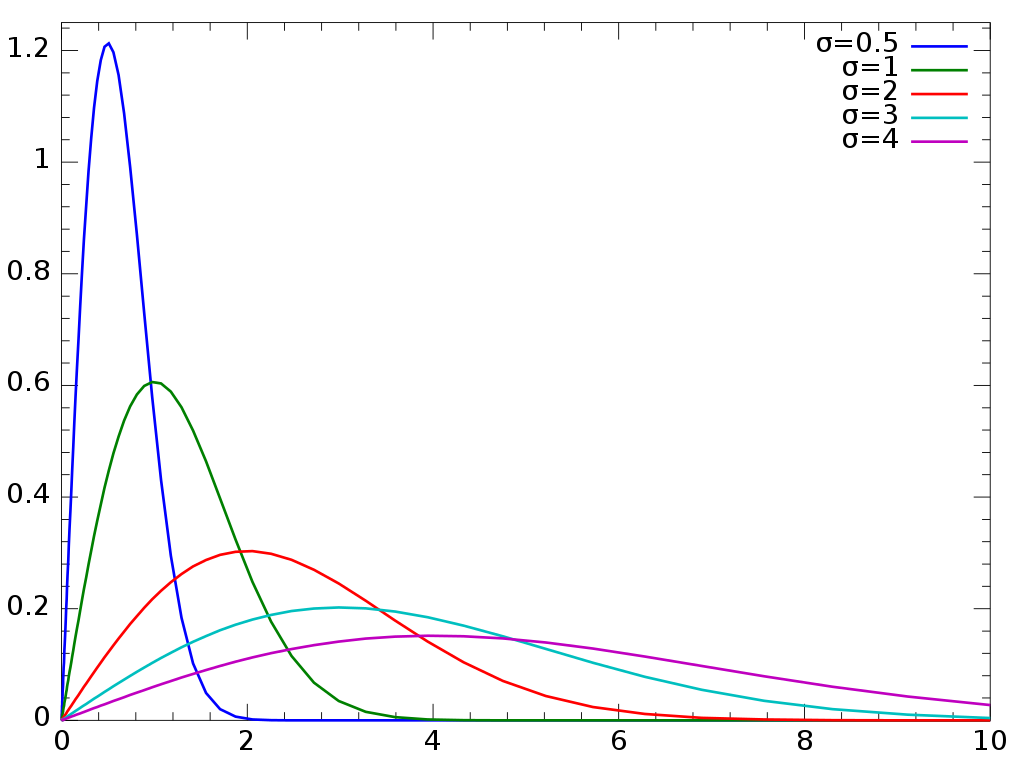

<font color=red>***We need to estimate our parameters.  Looking at the graph from Wikipedia, we see that the shape of the curve when $\sigma = 0.5$ is pretty close, so let's go with 0.6.  <font color=blue>What should our starting estimate of $a$?  <font color=red>Let's look at what a coefficient does to a function:***

In [ ]:
x = np.linspace(0, np.pi, 50)
y1 = np.sin(x)
y2 = 2 * np.sin(x)
plt.plot(x, y1)
plt.plot(x, y2)

<font color=red>***So what should pick for a starting value for $a$?***

In [ ]:
x = np.linspace(0, np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(2 * x)
plt.plot(x, y1)
plt.plot(x, y2)

<font color=blue>***What did $b$ do?  <font color=red>Stretched the curve horizontally.***

In [ ]:
x = np.linspace(0, 2 * np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(x + 2)
plt.plot(x, y1)
plt.plot(x, y2)

<font color=red>***$c$ shifts the curve horizontally.***

In [ ]:
x = np.linspace(0, np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(x) + 3
plt.plot(x, y1)
plt.plot(x, y2)

In [ ]:
params_0 = [0.6, 1000, 0.001, 0, 0]
popt, pcov = curve_fit(func, dms.index, dms, params_0)
f = lambda x: func(x, *popt)
rmse = (sum((f(x) - dms[x])**2 for x in dms.index) / 4)**0.5
rmse # really bad, but much better.  Next year, maybe try gamma distribution

In [ ]:
ax = dms.plot(linestyle='', marker='o')
y = [func(x, *popt) for x in dms.index]
ax.plot(dms.index, y)

<font color=red>***A point about how we write our equations - if we compare $y = asin(bx + c) + d$ with $y = sin(b(x + c)) + d$, we have changed the order of operations and we have to change the way we think about how our parameters affect the graph.***

<font color=blue>***What can we do if we have no idea what the starting parameters should be?  <font color=red>Try a bunch of different ones.***

## <font color=blue> Worksheet

<font color=sandybrown>***Use postable worksheet solution pdf.***

In [ ]:
def get_parabola(xy_list):
    x = np.array([coords[0] for coords in xy_list])
    y = np.array([coords[1] for coords in xy_list])
    X = np.column_stack([x, x**2])
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.params[2], results.params[1], results.params[0]